In [1]:
# === CNN Fashion MNIST with 6 layers ===
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import Input

In [2]:
# 1. Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
# 2. Preprocessing
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# 3. Build CNN model (6 layers)
model = Sequential([
    Input(shape=(28,28,1)),         
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

2025-09-23 21:49:20.629543: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-09-23 21:49:20.629566: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-23 21:49:20.629572: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-23 21:49:20.629749: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-23 21:49:20.629759: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# 4. Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# 5. Train
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)


Epoch 1/5


2025-09-23 21:49:21.205085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


750/750 - 16s - 22ms/step - accuracy: 0.8494 - loss: 0.4281 - val_accuracy: 0.8888 - val_loss: 0.3090
Epoch 2/5
750/750 - 15s - 20ms/step - accuracy: 0.8979 - loss: 0.2888 - val_accuracy: 0.8895 - val_loss: 0.3019
Epoch 3/5
750/750 - 15s - 21ms/step - accuracy: 0.9093 - loss: 0.2578 - val_accuracy: 0.8871 - val_loss: 0.3478
Epoch 4/5
750/750 - 16s - 21ms/step - accuracy: 0.9069 - loss: 0.2891 - val_accuracy: 0.8924 - val_loss: 0.3835
Epoch 5/5
750/750 - 15s - 20ms/step - accuracy: 0.9030 - loss: 0.3936 - val_accuracy: 0.8588 - val_loss: 0.8805


In [7]:
# 6. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test accuracy: {test_acc:.4f}")


✅ Test accuracy: 0.8570


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


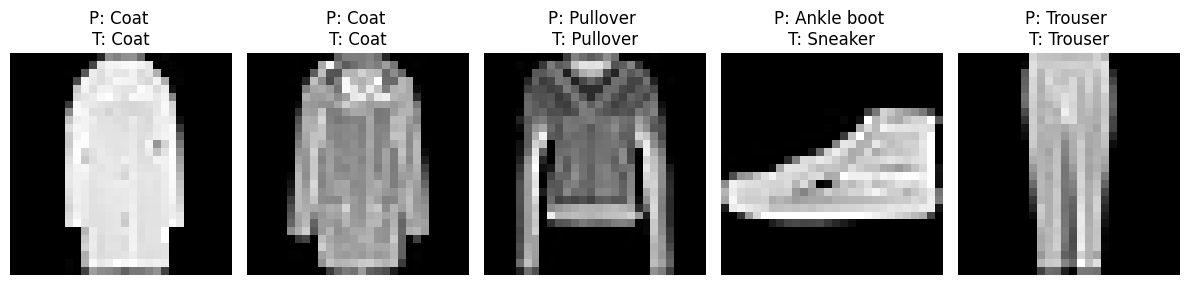

In [8]:
# 7. Prediction

import numpy as np
import matplotlib.pyplot as plt

# MNIST Fashion class label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 5 random samples from the test set
indices = np.random.choice(len(x_test), 5)

# Prediction
preds = model.predict(x_test[indices])

# Plot 5 images in a grid
plt.figure(figsize=(12, 6))

for i, idx in enumerate(indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx].squeeze(), cmap="gray", interpolation="nearest")
    plt.title(f"P: {class_names[np.argmax(preds[i])]} \nT: {class_names[np.argmax(y_test[idx])]}")
    plt.axis("off")

plt.tight_layout()
plt.show()